# Regularized Regression on House Pricing Dataset
We consider a reduced version of a dataset containing house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

[https://www.kaggle.com/harlfoxem/housesalesprediction]

For each house we know 19 house features (e.g., number of bedrooms, number of bathrooms, etc.) plus its price, that is what we would like to predict.

In [178]:
#import all packages needed
%matplotlib inline
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the data, remove data samples/points with missing values (NaN) and take a look at them.

In [179]:
#load the data
df = pd.read_csv('kc_house_data.csv', sep = ',')

#remove the data samples with missing values (NaN)
df = df.dropna() 

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,3.164000e+03,3.164000e+03,3164.000000,3164.000000,3164.000000,3.164000e+03,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000
mean,4.645240e+09,5.354358e+05,3.381163,2.071903,2070.027813,1.525054e+04,1.434893,0.009798,0.244311,3.459229,7.615676,1761.252212,308.775601,1967.489254,94.668774,98077.125158,47.557868,-122.212337,1982.544564,13176.302465
std,2.854203e+09,3.809004e+05,0.895472,0.768212,920.251879,4.254457e+04,0.507792,0.098513,0.776298,0.682592,1.166324,815.934864,458.977904,28.095275,424.439427,54.172937,0.140789,0.139577,686.256670,25413.180755
min,1.000102e+06,7.500000e+04,0.000000,0.000000,380.000000,6.490000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.177500,-122.514000,620.000000,660.000000
25%,2.199775e+09,3.150000e+05,3.000000,1.500000,1430.000000,5.453750e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1950.000000,0.000000,98032.000000,47.459575,-122.324250,1480.000000,5429.500000
50%,4.027701e+09,4.450000e+05,3.000000,2.000000,1910.000000,8.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1545.000000,0.000000,1969.000000,0.000000,98059.000000,47.572500,-122.226000,1830.000000,7873.000000
75%,7.358175e+09,6.402500e+05,4.000000,2.500000,2500.000000,1.122250e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2150.000000,600.000000,1990.000000,0.000000,98117.000000,47.680250,-122.124000,2360.000000,10408.250000
max,9.839301e+09,5.350000e+06,8.000000,6.000000,8010.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,6720.000000,2620.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,425581.000000


Extract input and output data. We want to predict the price by using othr features (other than id) as input.

In [180]:
Data = df.values
#N = number of input samples
N = 3164
Y = Data[:N,2]
X = Data[:N,3:]

## Data Pre-Processing

Split the data into training a training set of $N_{tr}$ samples and a test set of $N_{te}:=N-N_{tr}$ samples.

In [181]:
# Split data into train (50 samples) and test data (the rest)
Ntr = 50
Nte = N - Ntr
from sklearn.cross_validation import train_test_split

#PUT YOUR NUMERO DI MATRICOLA BELOW!
numero_di_matricola = 1067494

Xtr, Xte, Ytr, Yte = train_test_split(X, Y, test_size=Nte/N, random_state=numero_di_matricola)


Standardize the data.

In [182]:
# Data pre-processing
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(Xtr)
Xtr = scaler.transform(Xtr)
Xte = scaler.transform(Xte)

C:\Program Files\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Least-Squares Solution

The routine LinearRegression.score(X,y) computes the *Coefficient of determination* $R^2$, defined as:

$$R^2 = 1- \frac{RSS}{TSS}$$

where $RSS$ is the *Residual Sum of Squares* and $TSS$ is the *Total Sum of Square*. Denoting with $\hat{y}_i$ the $i$-th predicted output values, they are so defined:

\begin{align*}
RSS &= \sum_{i=1}^N (y_i - \hat{y}_i)^2\\
TSS &= \sum_{i=1}^N (y_i -\bar{y}_i)^2, \qquad \qquad \bar{y}_i=\frac{1}{N} \sum_{i=1}^N y_i
\end{align*}

In this notebook we will mostly use the coefficient of determination $R^2$ (instead of the RSS) as a measure to compare models and choose tuning parameters.

### TODO 1

Answer the following: are we interested in models with low $R^2$ or high $R^2$? Why? (max 5 lines)

Now compute the Least-Squares estimate using LinearRegression() in Scikit-learn, and print the corresponding score in training and test data.

We are interested in models with low RSS wich implies a high R^2 (close to 1).

In [183]:
# Least-Squares
from sklearn import linear_model as lm
#OLS is the linear regression model
OLS = lm.LinearRegression()

#fit the model on training data
OLS.fit(Xtr,Ytr)

#obtain predictions on training data
Yhat_tr = OLS.predict(Xtr)

#coefficients from the model
b_LS = np.hstack((OLS.intercept_, OLS.coef_))

print "Coefficient of determination on training data:", OLS.score(Xtr,Ytr)
print "Coefficient of determination on test data:", OLS.score(Xte, Yte)


Coefficient of determination on training data: 0.80923921119
Coefficient of determination on test data: 0.197562818172


### TODO 2

Compute the confidence interval for each coefficient.

In [184]:
# Least-Squares: Confidence Intervals
from scipy.stats import t

#add the column of all ones for the intercept of the model
Xtr_intercept = np.hstack((np.ones((Xtr.shape[0],1)), Xtr))

#alpha for confidence intervals
alpha = 0.05

#quantile from t-student distribution
tperc = t.ppf(1-alpha/2, Ntr-Xtr_intercept.shape[1], loc=0, scale=1)
OLS.get_params()
sigma2 = np.linalg.norm((Ytr-Yhat_tr))**2/(Ntr-Xtr_intercept.shape[1])

R = np.dot(Xtr_intercept.transpose(),Xtr_intercept)

Ri = np.linalg.pinv(R,1e-15)

v = np.sqrt(np.diagonal(Ri).copy())

Delta = (sigma2**(1/2))*tperc*v


CI = np.transpose(np.vstack((b_LS,b_LS))) + np.transpose(np.vstack((-Delta,+Delta) ))


Plot the LS coefficients and their confidence interval.

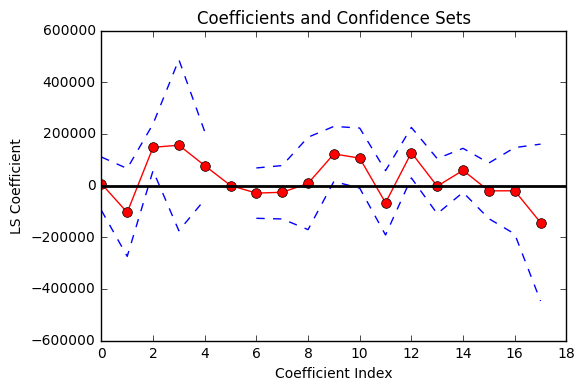

In [185]:
# Plot confidence intervals
plt.figure(1)
plt.plot(b_LS[1:], 'r', marker='o', ms=7.0)
plt.plot(CI[1:,0], 'b--')
plt.plot(CI[1:,1], 'b--')
plt.plot(np.zeros(b_LS.shape[0],), 'k', linewidth=2.0)
plt.xlabel('Coefficient Index')
plt.ylabel('LS Coefficient')
plt.title('Coefficients and Confidence Sets')
plt.show()

### Question: based on the results above, if you had to choose at most 5 features for a linear regression model, which ones would you choose? Why?

### TODO 3
I would choose features {2,9,10,12,14} indexed as above. We believe that the found confidence intervals should contain the true value of the linear coefficients 95% of the times. So in this situation I would first choose the features with confidence intervals not containig the origin (indexes 2, 9 and 12) and then look at wich interval is likely to be the first that no longer contain the origin if we gradually increase alpha (indexes 10 and 14). Let's note that the coefficient of index 5 has no confidence interval because $Xtr[:,5]$ is equal to a row of zeroes so from this training set we don't have any clue of what could be the effect on the price of a non-zero value for the variable waterfront. Hopefully the algorithms leads in this case to assign to the correspondent coefficient's Delta the value nan. 

## Best-Subset Selection

Split the training data into a training and validation dataset. For $k$ going from 1 to $n_{sub}=5$:
1. Compute the LS estimate using all the possible subsets of $k$ features
2. Compute the prediction error on the validation dataset

Choose the subset of $k^*$ features giving the lowest validation error.


In [186]:
import itertools
Xtr_cv, Xva_cv, Ytr_cv, Yva_cv = train_test_split(Xtr, Ytr, test_size=0.33, random_state=78948616)# I defined random_state here to keep a fixed solution over each execution of the code.
nsub = 5 # Xtr.shape[1]
features_idx_dict = {}
validation_err_dict = {}
validation_err_min = np.zeros(nsub,)
validation_err_min_idx = np.zeros(nsub, dtype=np.int64)
for k in range(1,nsub+1):
    features_idx = list(itertools.combinations(range(Xtr.shape[1]),k))
    validation_error = np.zeros(len(features_idx),)
    for j in range(len(features_idx)):
        OLS_subset = lm.LinearRegression()
        OLS_subset.fit(Xtr_cv[:,features_idx[j]], Ytr_cv)
        validation_error[j] = 1 - OLS_subset.score(Xva_cv[:,features_idx[j]], Yva_cv)
    validation_err_min[k-1] = np.min(validation_error)    
    validation_err_min_idx[k-1] = np.argmin(validation_error)
    features_idx_dict.update({k: features_idx})
    validation_err_dict.update({k: validation_error})

Plot the validation error as a function of the number of retained features.

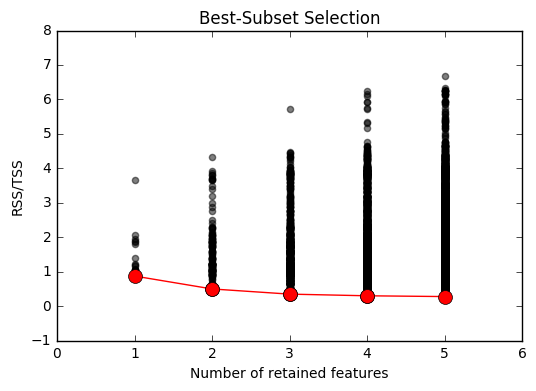

In [187]:
# Plot
plt.figure(2)
for k in range(1,nsub+1):
    plt.scatter(k*np.ones(validation_err_dict[k].shape), validation_err_dict[k], color='k', alpha=0.5)
    #plt.scatter(k, validation_err_min[k-1], color='r', alpha=0.8)
    if k > 1:
        plt.plot([k-1, k], [validation_err_min[k-2], validation_err_min[k-1]], color='r',marker='o', 
            markeredgecolor='k', markerfacecolor = 'r', markersize = 10)
plt.xlabel('Number of retained features')
plt.ylabel('RSS/TSS')
plt.title('Best-Subset Selection')
plt.show()

Compute the LS estimate using the selected subset of features.

### TODO 4: pick the number of features for the best subset according to figure above, learn the model on the entire training data, and compute score on training and on test data

In [188]:
OLS_best_subset = lm.LinearRegression()

# now pick the number of features according to best subset
opt_num_features = 5

#opt_features_idx contains the indices of the features from best subset
opt_features_idx = features_idx_dict[opt_num_features][validation_err_min_idx[opt_num_features - 1]]

#let's print the indices of the features from best subset
print opt_features_idx

#fit the best subset on the entire training set
OLS_best_subset.fit(Xtr[:,opt_features_idx], Ytr)

#print the coefficient of determination on training and on test data
print "Coefficient of determination on training data:", OLS_best_subset.score(Xtr[:,opt_features_idx],Ytr)
print "Coefficient of determination on test data:", OLS_best_subset.score(Xte[:,opt_features_idx],Yte)

(7, 12, 14, 15, 16)
Coefficient of determination on training data: 0.616211833918
Coefficient of determination on test data: 0.301530965915


### TODO 5: do the features from best subset selection correspond to the ones you would have chosen based on confidence intervals for the linear regression coefficients? Comment (max 5 lines)

Only some features correspond to the ones previously chosen, this due to several motivations. First, only a part of the training set has been used to fit the model in BSS, leading to different (probably less acurate) values of the coefficients (modifying thus their distance to the origin). This is accentuated by the fact that by choosing only a subset of the features, the contribution to Y of the missing features tends to be distributed among the others. But the main point is that BSS is based on the acuracy of a certain subset to predict outputs for previously unseen inputs while null hypothesis testing is only based on coefficients values fitted over training set and their variance. Finally, even a feature with a little coefficient is important if a true linear correlation exist with the output.

## Ridge Regression

### TODO 6: Shrinkage Evaluation

Compute the ridge regression coefficients on the training data (write the formula manually) using different values of the regularization parameter $\lambda$.


In [189]:
#these are the values of lambda that you are going to use
lam_values = np.logspace(0, 4, 300)


#ridge_coeff will contain the solutions; note that we include \beta_0 in the model
ridge_coeff = np.zeros((Xtr_intercept.shape[1], len(lam_values)))

#norm will contain the norm of the solutions
norm_ridge_coeff = np.zeros(len(lam_values),)


for i in range(len(lam_values)):
    ridge_coeff[:,i] = np.dot(np.dot(np.linalg.pinv(R-lam_values[i]*np.identity(Xtr_intercept.shape[1])),Xtr_intercept.transpose()),Ytr)
    norm_ridge_coeff[i] = np.linalg.norm(ridge_coeff[:,i])
    


Plot the norm of the estimated coefficient vector vs the regularization parameter $\lambda$. In this way you will be able to evaluate the coefficients shrinkage achieved through ridge regression.

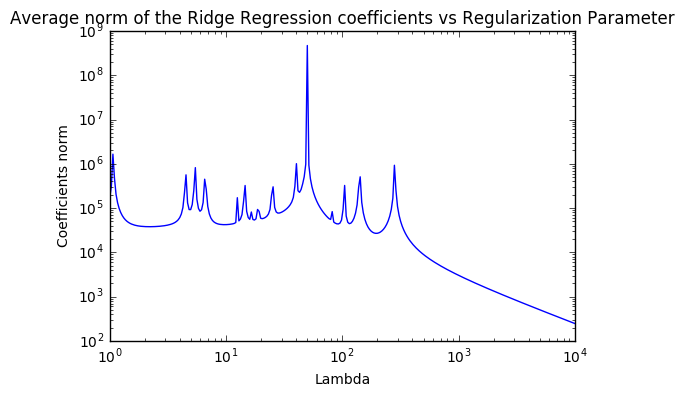

In [190]:
plt.figure(3)
plt.xscale('log')
plt.yscale('log') #code line added in order to make visible the trend of the curve
plt.plot(lam_values, norm_ridge_coeff/Xtr_intercept.shape[1])
plt.xlabel('Lambda')
plt.ylabel('Coefficients norm')
plt.title('Average norm of the Ridge Regression coefficients vs Regularization Parameter')
plt.show()

### TODO 7: explain the results shown in the figure above (max 5 lines)

The figure above shows that the norm of the coefficients has first an irregular transient with some high peaks but then, when $\lambda$ surpass 120, it becomes monotonically decreasing and seems to definitely converge to zero. This could be expected as $\lambda$ is the weight of the penalty due to the coefficients norm in the minimization problem. 

### TODO 8: Use k-fold Cross-Validation to fix the regularization parameter

Use the scikit-learn built-in routine *Ridge* (from the *linear_regression* package) to compute the ridge regression coefficients.

Use *KFold* from *sklearn.cross_validation* to split the data into the desired number of folds.

Then pick $lam\_opt$ to be the chosen value for the regularization parameter.

In [191]:
from sklearn.cross_validation import KFold
num_folds = 5
kf = KFold(n=Ntr, n_folds=num_folds)

#loss_ridge_kfold will contain the value of the loss
loss_ridge_kfold = np.zeros(len(lam_values),)

for i in range(len(lam_values)):
    
    #define a ridge regressor using Ridge() for the i-th value of lam_values
    ridge_kfold = lm.Ridge(alpha=lam_values[i])
    for train_index, validation_index in kf:
        Xtr_kfold, Xva_kfold = Xtr[train_index], Xtr[validation_index]
        Ytr_kfold, Yva_kfold = Ytr[train_index], Ytr[validation_index]
        
        #learn the model using the training data from the k-fold
        ridge_kfold.fit(Xtr_kfold, Ytr_kfold)
        
        #compute the loss using the validation data from the k-fold
        loss_ridge_kfold[i] += np.linalg.norm(ridge_kfold.predict(Xva_kfold)-Yva_kfold)

loss_ridge_kfold /= Ntr

#choose the regularization parameter that minimizes the loss
lam_opt = lam_values[np.argmin(loss_ridge_kfold)]
print "Best value of the regularization parameter:", lam_opt

Best value of the regularization parameter: 65.9778247954


Plot the Cross-Validation estimate of the prediction error as a function of the regularization parameter

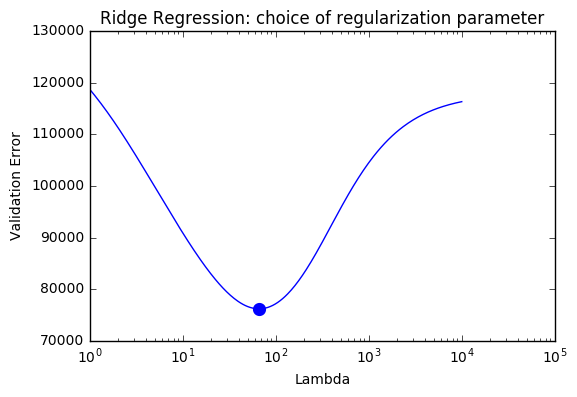

In [192]:
plt.figure(4)
plt.xscale('log')
plt.plot(lam_values, loss_ridge_kfold, color='b')
plt.scatter(lam_opt, loss_ridge_kfold[np.argmin(loss_ridge_kfold)], color='b', marker='o', linewidths=5)
plt.xlabel('Lambda')
plt.ylabel('Validation Error')
plt.title('Ridge Regression: choice of regularization parameter')
plt.show()

### TODO 9: now estimate the ridge regression coefficients using all the training data and the optimal regularization parameter (chosen at previous step)

In [193]:
# Estimate Ridge Regression Coefficients with all data for the the optimal value lam_opt of the regularization paramter

#define the model using the optimal value lam_opt
ridge_reg = lm.Ridge(alpha=lam_opt)
#fit using the training data
ridge_reg.fit(Xtr,Ytr)

print "Coefficient of determination on training data:", ridge_reg.score(Xtr,Ytr)
print "Coefficient of determination on test data:", ridge_reg.score(Xte,Yte)

Coefficient of determination on training data: 0.694546203238
Coefficient of determination on test data: 0.515076178397


Compare the LS and the ridge regression coefficients.

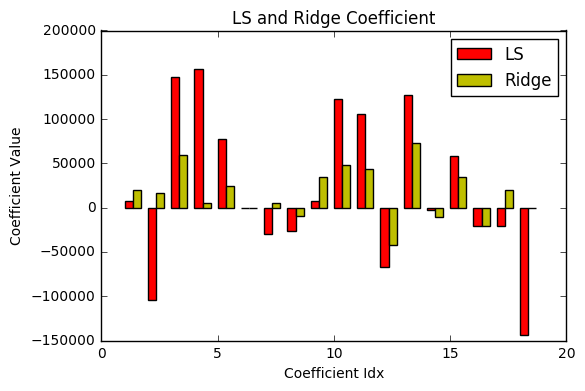

In [194]:
# Compare LS and ridge coefficients
ind = np.arange(1,len(OLS.coef_)+1)  # the x locations for the groups
width = 0.35       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, OLS.coef_, width, color='r')
rects2 = ax.bar(ind + width, ridge_reg.coef_, width, color='y')
ax.legend((rects1[0], rects2[0]), ('LS', 'Ridge'))
plt.xlabel('Coefficient Idx')
plt.ylabel('Coefficient Value')
plt.title('LS and Ridge Coefficient')
plt.show()

### TODO 10: comment on the comparison among the LS and Ridge Regression coefficients (max 5 lines)


First of all, let's state that Ridge Regression's coefficient of determination on test data is quite closer to 1 than the LS and BSS ones (0.5 vs 0.2 and 0.3). Now, regarding the features's linear coefficients, the bar plot hereinabove confirm the expected general tendency : the norm of the coefficients is reduced in Ridge Regression. We can also note that many LS coefficients have a different sign than their corresponding Ridge coefficients. Only two coefficients (one of which is null) are the same in both. It's difficult to say more about the relations between the two, especially as it may just be coincidences.

## Lasso

Use the routine *lasso_path* from *sklearn.linear_regression* to compute the "lasso path" for different values of the regularization parameter $\lambda$. 


In [195]:
from sklearn.linear_model import lasso_path

# To pass a specific range of lambda values
#lasso_lams, lasso_coefs, _ = lasso_path(Xtr, Ytr, alphas=lam_values)  

# If no value is passed, the routine automatically select a range of values 
lasso_lams, lasso_coefs, _ = lasso_path(Xtr, Ytr) 



Evaluate the sparsity in the estimated coefficients as a function of the regularization parameter $\lambda$: to this purpose, compute the number of non-zero entries in the estimated coefficient vector.

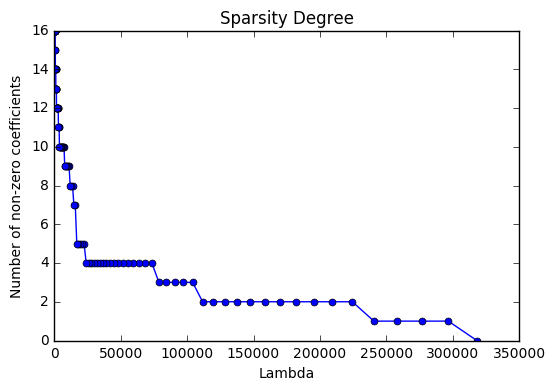

In [196]:
l0_coef_norm = np.zeros(len(lasso_lams),)

for i in range(len(lasso_lams)):
    l0_coef_norm[i] = sum(lasso_coefs[:,i]!=0)

plt.figure(6)
plt.plot(lasso_lams, l0_coef_norm, marker='o', markersize=5)

plt.xlabel('Lambda')
plt.ylabel('Number of non-zero coefficients')
plt.title('Sparsity Degree')
plt.show()

### TODO 11: explain the results in the figure above (max 5 lines)

In Lassso we put a bound to the L-1 norm of $\beta$, wich is eauivalent to minimise a function where this number apears as penalty multiplyed by a factor $\lambda$, the bound become more strict as $\lambda$ increases starting from 0. Equivalently we can think to the shrinkage factor, wich starting from 1, tend to 0. As we know during this process the Lasso coefficients's modules will decrease until each one successively reach and stay fixed at zero, this is why we obtain a sort of descending staircase function. Turn the next cell from Markdown to Code and run it to see a plot of the process previously explained.

plt.figure(62)
plt.xscale('log')
for i in range(lasso_coefs.shape[0]):
    index= str(i)
    plt.plot(lasso_lams, lasso_coefs[i,:], marker='o', markersize=2, label= index)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('Lambda')
plt.ylabel('Number of non-zero coefficients')
plt.title('Sparsity Degree')
plt.show()

### TODO 12: Use k-fold Cross-Validation to fix the regularization parameter

Use the routine *LassoCV* from the package *sklearn.linear_regression* to fix the regularization parameter $\lambda$ throug k-fold cross-validation.

In [197]:
# use LassoCV passing num_folds for the number of folds in CV
lasso_kfold = lm.LassoCV(cv=num_folds)

#fit using the training set
lasso_kfold.fit(Xtr,Ytr)

print "Total number of coefficients:", len(lasso_kfold.coef_)
print "Number of non-zero coefficients:", sum(lasso_kfold.coef_ != 0)
print "Best value of regularization parameter:", lasso_kfold.alpha_
loss_lasso_kfold = np.sum(lasso_kfold.mse_path_, axis=1)


Total number of coefficients: 18
Number of non-zero coefficients: 4
Best value of regularization parameter: 55580.7260684


### TODO 13: Plot the Cross-Validation estimate of the prediction error  as a function of the regularization parameter $\lambda$

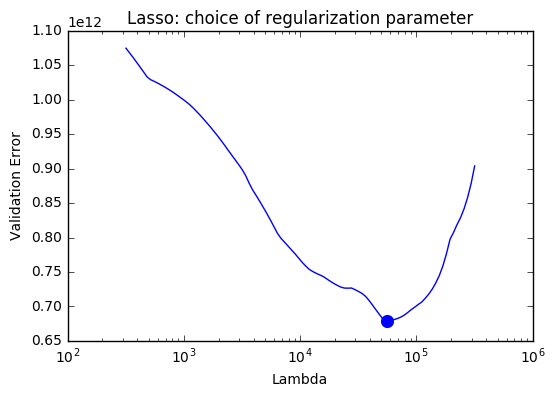

In [198]:
plt.figure(7)
plt.xscale('log')

#plot the lasso k-fold loss as a function of the lasso_kfold.alphas_
plt.plot(lasso_lams, loss_lasso_kfold,color='b')


#this plots the best value of the regularization parameter
plt.scatter(lasso_kfold.alpha_, loss_lasso_kfold[np.where(lasso_kfold.alphas_ == lasso_kfold.alpha_)], 
    color='b', marker='o', linewidths=5)
plt.xlabel('Lambda')
plt.ylabel('Validation Error')
plt.title('Lasso: choice of regularization parameter')
plt.show()

### TODO 14: describe the results in the figure above and its relation to the best lambda chosen by CV

We can see that the best value of regularization parameter has been choosen in order to minimize the Cross-Validation estimate of the prediction error over the range of lamdas.

### TODO 15: Now estimate the LASSO regression coefficients using all the training data and the optimal regularization parameter (chosen through k-fold cross-validation).

Use the routine *lasso* from *sklearn.linear_regression* to do it.


In [199]:
#define a lasso model with Lasso() using the best value of the regularization parameter
lasso_reg =  lm.Lasso(alpha=lasso_kfold.alpha_)
#fit the model using the entire training set
lasso_reg.fit(Xtr,Ytr)

print "Coefficient of determination on training data:", lasso_reg.score(Xtr,Ytr)
print "Coefficient of determination on test data:", lasso_reg.score(Xte,Yte)

Coefficient of determination on training data: 0.736317986276
Coefficient of determination on test data: 0.476664901115


## Compare LS, Ridge and Lasso coefficients

Use a bar plot to compare the estimated coefficients by means of these three estimators.

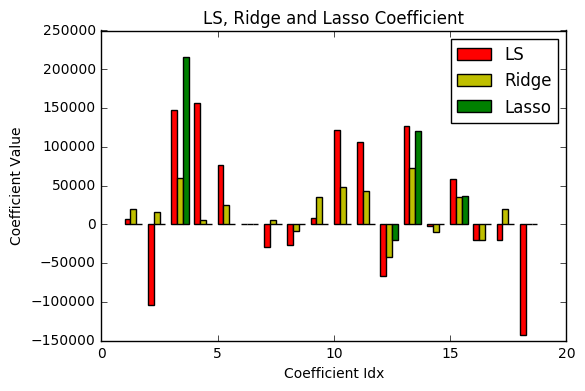

In [200]:
ind = np.arange(1,len(OLS.coef_)+1)  # the x locations for the groups
width = 0.25       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, OLS.coef_, width, color='r')
rects2 = ax.bar(ind + width, ridge_reg.coef_, width, color='y')
rects3 = ax.bar(ind + 2*width, lasso_reg.coef_, width, color='g')
ax.legend((rects1[0], rects2[0], rects3[0]), ('LS', 'Ridge', 'Lasso'))
plt.xlabel('Coefficient Idx')
plt.ylabel('Coefficient Value')
plt.title('LS, Ridge and Lasso Coefficient')
plt.show()

### TODO 16: how do coefficient from the Lasso model compare to LS and Ridge Regression? (max 5 lines)
First, only 4 coefficients from the Lasso and model are not null, in this case they are a subset of the Ridge coefficients with higher values. The little number of coefficients could be useful to speed up calculations. Let's also point out that the Lasso coefficients are thoose wich absolute value vary in the wider range : we can interpret this by reminding us that the bound is on the L-1 norm of the vector and not in the single coefficients absolute values.

## Evaluate the performance on the test set



In [201]:
print "Coefficient of determination of LS on test data:", OLS.score(Xte,Yte)
print "Coefficient of determination of LS (with subset selection) on test data:", OLS_best_subset.score(Xte[:,opt_features_idx],Yte)
print "Coefficient of determination of Ridge Regression on test data:", ridge_reg.score(Xte,Yte)
print "Coefficient of determination of LASSO on test data:", lasso_reg.score(Xte,Yte)

Coefficient of determination of LS on test data: 0.197562818172
Coefficient of determination of LS (with subset selection) on test data: 0.301530965915
Coefficient of determination of Ridge Regression on test data: 0.515076178397
Coefficient of determination of LASSO on test data: 0.476664901115


### TODO 17: comment and compare the results obtained by the different methods (max 10 lines)
We are interested in the performances on the test set as they represent data previously "unseen" by the model and thus offer a good estimate of error in future predictions. Least squares has the worst $R^2$ (around 0.2), we know that this is due to bias-variance decomposition of the expected generalisation error, by allowing too much degrees of freedom for $\beta$ we get a high variance of our estimate wich depends on models/hypothesis set and the model is overfitted. In order to find a better bias–variance tradeoff we use the three next regression methods. Putting a bound on the number of coefficients is simplest method but with LS subset selection the $R^2$ increases of only one decimal point. Instead by putting a bound on L-2 (Ridge) or L-1 (Lasso) norm of $\beta$, that is considering a continuous approach on the limitation of the degrees of freedom of the model, we obtain better results : $R^2$ is slightly over and under 0.5 for, respectively, Ridge Regression and LASSO.

### TODO 18: use different data size

Perform the same estimation procedures using different more points on the training data, that is fix Ntr = 100. You can simply copy and paste the code above into the cell below.

C:\Program Files\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Note : it has been graphically verified that even with Ntr=100 we have opt_num_features = 5 for Best Subset Selection
Number of non-zero coefficients in LASSO : 12


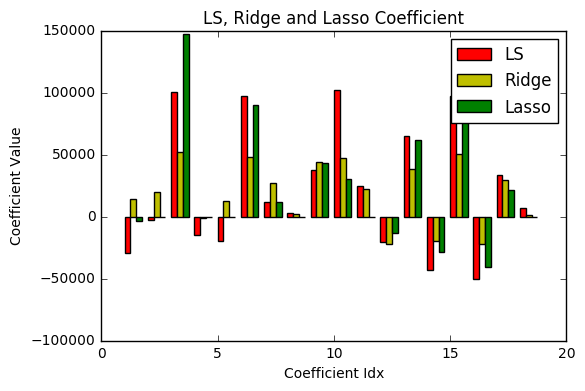

Coefficient of determination of LS on test data: 0.671488304135
Coefficient of determination of LS (with subset selection) on test data: 0.547005935314
Coefficient of determination of Ridge Regression on test data: 0.629962923993
Coefficient of determination of LASSO on test data: 0.671040498861


In [202]:
#put in this cell the code to do the same analysis as before but with Ntr=100

# Split data into train (50 samples) and test data (the rest)
Ntr = 100
Nte = N - Ntr
from sklearn.cross_validation import train_test_split

#PUT YOUR NUMERO DI MATRICOLA BELOW!
numero_di_matricola = 1067494

Xtr, Xte, Ytr, Yte = train_test_split(X, Y, test_size=Nte/N, random_state=numero_di_matricola)

# Data pre-processing
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(Xtr)
Xtr = scaler.transform(Xtr)
Xte = scaler.transform(Xte)

# Least-Squares
from sklearn import linear_model as lm
#OLS is the linear regression model
OLS = lm.LinearRegression()

#fit the model on training data
OLS.fit(Xtr,Ytr)

#obtain predictions on training data
Yhat_tr = OLS.predict(Xtr)

#coefficients from the model
b_LS = np.hstack((OLS.intercept_, OLS.coef_))

Xtr_intercept = np.hstack((np.ones((Xtr.shape[0],1)), Xtr))


OLS.get_params()
sigma2 = np.linalg.norm((Ytr-Yhat_tr))**2/(Ntr-Xtr_intercept.shape[1])

R = np.dot(Xtr_intercept.transpose(),Xtr_intercept)

Ri = np.linalg.pinv(R,1e-15)

v = np.sqrt(np.diagonal(Ri).copy())

import itertools
Xtr_cv, Xva_cv, Ytr_cv, Yva_cv = train_test_split(Xtr, Ytr, test_size=0.33, random_state=78948616)# I defined random_state here to keep a fixed solution over each execution of the code.
nsub = 5 # Xtr.shape[1]
features_idx_dict = {}
validation_err_dict = {}
validation_err_min = np.zeros(nsub,)
validation_err_min_idx = np.zeros(nsub, dtype=np.int64)
for k in range(1,nsub+1):
    features_idx = list(itertools.combinations(range(Xtr.shape[1]),k))
    validation_error = np.zeros(len(features_idx),)
    for j in range(len(features_idx)):
        OLS_subset = lm.LinearRegression()
        OLS_subset.fit(Xtr_cv[:,features_idx[j]], Ytr_cv)
        validation_error[j] = 1 - OLS_subset.score(Xva_cv[:,features_idx[j]], Yva_cv)
    validation_err_min[k-1] = np.min(validation_error)    
    validation_err_min_idx[k-1] = np.argmin(validation_error)
    features_idx_dict.update({k: features_idx})
    validation_err_dict.update({k: validation_error})

OLS_best_subset = lm.LinearRegression()

print "Note : it has been graphically verified that even with Ntr=100 we have opt_num_features = 5 for Best Subset Selection"
# now pick the number of features according to best subset
opt_num_features = 5

#opt_features_idx contains the indices of the features from best subset
opt_features_idx = features_idx_dict[opt_num_features][validation_err_min_idx[opt_num_features - 1]]


#fit the best subset on the entire training set
OLS_best_subset.fit(Xtr[:,opt_features_idx], Ytr)

#these are the values of lambda that you are going to use
lam_values = np.logspace(0, 4, 300)


#ridge_coeff will contain the solutions; note that we include \beta_0 in the model
ridge_coeff = np.zeros((Xtr_intercept.shape[1], len(lam_values)))

#norm will contain the norm of the solutions
norm_ridge_coeff = np.zeros(len(lam_values),)


for i in range(len(lam_values)):
    ridge_coeff[:,i] = np.dot(np.dot(np.linalg.pinv(R-lam_values[i]*np.identity(Xtr_intercept.shape[1])),Xtr_intercept.transpose()),Ytr)
    norm_ridge_coeff[i] = np.linalg.norm(ridge_coeff[:,i])
    
from sklearn.cross_validation import KFold
num_folds = 5
kf = KFold(n=Ntr, n_folds=num_folds)

#loss_ridge_kfold will contain the value of the loss
loss_ridge_kfold = np.zeros(len(lam_values),)

for i in range(len(lam_values)):
    
    #define a ridge regressor using Ridge() for the i-th value of lam_values
    ridge_kfold = lm.Ridge(alpha=lam_values[i])
    for train_index, validation_index in kf:
        Xtr_kfold, Xva_kfold = Xtr[train_index], Xtr[validation_index]
        Ytr_kfold, Yva_kfold = Ytr[train_index], Ytr[validation_index]
        
        #learn the model using the training data from the k-fold
        ridge_kfold.fit(Xtr_kfold, Ytr_kfold)
        
        #compute the loss using the validation data from the k-fold
        loss_ridge_kfold[i] += np.linalg.norm(ridge_kfold.predict(Xva_kfold)-Yva_kfold)

loss_ridge_kfold /= Ntr

#choose the regularization parameter that minimizes the loss
lam_opt = lam_values[np.argmin(loss_ridge_kfold)]

# Estimate Ridge Regression Coefficients with all data for the the optimal value lam_opt of the regularization paramter

#define the model using the optimal value lam_opt
ridge_reg = lm.Ridge(alpha=lam_opt)
#fit using the training data
ridge_reg.fit(Xtr,Ytr)

from sklearn.linear_model import lasso_path

# To pass a specific range of lambda values
#lasso_lams, lasso_coefs, _ = lasso_path(Xtr, Ytr, alphas=lam_values)  

# If no value is passed, the routine automatically select a range of values 
lasso_lams, lasso_coefs, _ = lasso_path(Xtr, Ytr) 

# use LassoCV passing num_folds for the number of folds in CV
lasso_kfold = lm.LassoCV(cv=num_folds)

#fit using the training set
lasso_kfold.fit(Xtr,Ytr)


print "Number of non-zero coefficients in LASSO :", sum(lasso_kfold.coef_ != 0)

loss_lasso_kfold = np.sum(lasso_kfold.mse_path_, axis=1)

#define a lasso model with Lasso() using the best value of the regularization parameter
lasso_reg =  lm.Lasso(alpha=lasso_kfold.alpha_)
#fit the model using the entire training set
lasso_reg.fit(Xtr,Ytr)

ind = np.arange(1,len(OLS.coef_)+1)  # the x locations for the groups
width = 0.25       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, OLS.coef_, width, color='r')
rects2 = ax.bar(ind + width, ridge_reg.coef_, width, color='y')
rects3 = ax.bar(ind + 2*width, lasso_reg.coef_, width, color='g')
ax.legend((rects1[0], rects2[0], rects3[0]), ('LS', 'Ridge', 'Lasso'))
plt.xlabel('Coefficient Idx')
plt.ylabel('Coefficient Value')
plt.title('LS, Ridge and Lasso Coefficient')
plt.show()

print "Coefficient of determination of LS on test data:", OLS.score(Xte,Yte)
print "Coefficient of determination of LS (with subset selection) on test data:", OLS_best_subset.score(Xte[:,opt_features_idx],Yte)
print "Coefficient of determination of Ridge Regression on test data:", ridge_reg.score(Xte,Yte)
print "Coefficient of determination of LASSO on test data:", lasso_reg.score(Xte,Yte)

### TODO 19: how do the results change with Ntr=100? (max 10 lines)
By doubling the number of training points we obtain a far higher (and then better) $R^2$ for each method. This time the best one is given by LS and then next to it LASSO (around 0.67. The Subset Selection scores nearly 0.55 while Ridge Regression stops at 0.63 thus letting his previous second place to LASSO. How can we explain this ? I believe that the success of LS is due to the fact that the information brought by the new trainig points enable the model to avoid overfitting : there is sufficient data to understand what comes from the noise instead of the underlying relationship between X and Y. Then Lasso obtain quite similar performances with only 12 features, wich leads us to think that the other ones are really unimportants. Ridge obtain good results but can't do as good as LS probably because it is proven to be a biased estimator. Finally Subset Selection is limited to subsets of maximum $n_{sub}=5$ features, probably the best subset would have contained more features wich are now missing and can't bring usefull information for the prediction. By looking at the coefficients we can see that they are often very similar between the different methods, we could think that as $Ntr$ increases the different solutions will converge to a common one.

# Regularized Classification on Titanic Dataset

We are going to use a dataset from a Kaggle competition (https://www.kaggle.com/c/titanic/data)
 
### Dataset description

>The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.  This sensational tragedy shocked the international community and led to better safety regulations for ships.

>One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.  Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

>In this contest, we ask you to complete the analysis of what sorts of people were likely to survive. 

[From the competition [homepage](http://www.kaggle.com/c/titanic-gettingStarted).]




In [203]:
%matplotlib inline  
import matplotlib.pyplot as plt

Load the data from a .csv file

In [204]:
from __future__ import division
import pandas as pd
import numpy as np

df = pd.read_csv("titanicData.csv") 
df = df.drop(['Ticket','Cabin','Name'], axis=1)
# Remove missing values
df = df.dropna() 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


Create data matrices: many of the features (columns of indices 0,1,3,4,6 in Xcat below) are categorical, so we first encode them with integers with LabelEncoder() and then obtain the indicator variables with OneHotEncoder()

## Data Preprocessing

The class labels are already 0-1, so we can use them directly.

In [223]:
Data = df.values
Xcat = Data[:,2:]
Y = Data[:,1]
n = Xcat.shape[1]  # number of features

num_samples = Xcat.shape[0]

#now encode categorical variables using integers and one-hot-encoder

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder()

#transform first column in integers; no need to use one hot encoder since it
#has only 3 values

X = onehot_encoder.fit_transform(Xcat[:,0].reshape(-1,1)).toarray()

#repeat for the other categorical input variables
ncoef = [3,0,0,0,0,0,0] # added codeline number of coefficients needed for each feature
index_categorical = [1,3,4,6]
numcoef = 0
for i in range(1,7):
    if i in index_categorical:
        X_tmp = label_encoder.fit_transform(Xcat[:,i])
        X_tmp = X_tmp.reshape(X_tmp.shape[0],1)
        X_tmp = onehot_encoder.fit_transform(X_tmp[:,0].reshape(-1,1)).toarray()
        X = np.hstack((X,X_tmp))
        ncoef[i]=X_tmp.shape[1] #added codeline
    else:
        X_tmp = Xcat[:,i]
        X_tmp = X_tmp.reshape(X_tmp.shape[0],1)
        X = np.hstack((X,X_tmp))
        ncoef[i]= 1 #added codeline

In [206]:
# Rename the class labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)
K = max(Y) + 1 # number of classes

print "Number of classes: "+str(K)

Number of classes: 2


Given $N$ total data points, keep $N_{tr}$ data points as data for training and validation and $N_{te}:=N-N_{tr}$ as test data. Splitting is random, use as seed your ``numero di matricola'' (see below)

In [207]:
# Split data into training and validation data
from sklearn.cross_validation import train_test_split
N = np.shape(X)[0]

#put here your ``numero di matricola''
Numero_di_Matricola = 1067494 

Ntrain = 50  # use 50 samples for training + validation...
Ntest = N-Ntrain # and the rest for testing

Xtr, Xtest, Ytr, Ytest = train_test_split(X, Y, test_size=Ntest/N, random_state = Numero_di_Matricola)

Ntr = Xtr.shape[0]
Ntest = Xtest.shape[0]


Design matrix is standardized to have zero-mean and unit variance (columnwise):

In [208]:
# Standardize the Features Matrix
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
Xtr = scaler.transform(Xtr)
Xtest = scaler.transform(Xtest)  # use the same transformation on test data

C:\Program Files\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Perform Logistic Regression

We now perform logistic regression using the function provided by Scikit-learn.

Note: as provided by Scikit-learn, logistic regression is always implemented using regularization. However, the impact of regularization can be dampened to have almost no regularization by changing the parameter $C$. In particular, using a very high value of $C$ reduces the impact from regularization. ($C$ is the inverse of the regularization parameter $\lambda$ - see TODO 4.)

Note that the intercept is estimated in the model.

In [209]:
from sklearn import linear_model
# define a logistic regression model with very high C parameter -> low impact from regularization
reg = linear_model.LogisticRegression(C=100000000, solver='newton-cg')

#fit the model on training data
reg.fit(Xtr, Ytr)

LogisticRegression(C=100000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

Note that the logistic regression function in Scikit-learn has many optional parameters. Read the documentation to understand what they do!

## TODO 1
### Examine coefficients from Logistic Regression (by print and plotting them)

[[ 1.25201779 -0.37342915 -0.77588061  1.22533153 -1.22533153 -0.03164777
   0.16921452 -0.21494585 -1.28222577  1.70938264  0.14792172  0.0772415
  -0.34982568  0.77546383 -0.70707244  0.84004774  0.06903809  0.0772415
   0.03444614 -0.9963157   0.21137852  0.15733322 -0.27011602]]


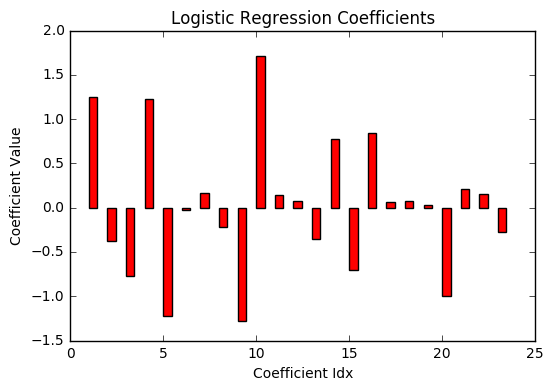

In [210]:
#print the coefficients from the logistic regression model.
print reg.coef_

# Plot the coefficients
reg_coef = reg.coef_.reshape(reg.coef_.shape[1],)
plt.figure()
ind = np.arange(1,len(reg_coef)+1)  # the x locations for the groups
width = 0.45       # the width of the bars
plt.bar(ind, reg_coef, width, color='r')
plt.xlabel('Coefficient Idx')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')
plt.show()

## TODO 2

### Questions: How many coefficients do you get? Why? How many of them are equal to 0? (max 5 lines)
We get 23 coefficients. Each quantitative feature need one coefficient while categorical features need a coefficient for each of their categories (number of different labels or values). Summing all of them we get 23 coefficients (see the code cell below, ncoef has been defined during data preprocessing coherently with my explanation). There isn't any null coefficients, however some of them are near to zero so null hypothesis testing could show that their confidence interval contain zero.

In [211]:
print "ncoef =", ncoef 
print "Sum of ncoef =", np.sum(ncoef)

ncoef = [3, 2L, 1, 6L, 7L, 1, 3L]
Sum of ncoef = 23


## TO DO 3
### Predict labels on training and validation

- Compute the predicted labels on training and validation data using reg.predict
 - Evaluate the accuracy using metrics.accuracy_score from scikit-learn (it returns the percentage of data correctly classified).
 - Evaluate the score used by logistic regression on training and validation data using metrics.accuracy_score()

In [212]:
from sklearn import metrics

#prediction on training data
Yhat_tr_LR = reg.predict(Xtr)

#prediction on test data
Yhat_test_LR = reg.predict(Xtest)

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for training dataset
print "Training Accuracy:", 100*metrics.accuracy_score(Yhat_tr_LR,Ytr)

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for test dataset
print "Test Accuracy:", 100*metrics.accuracy_score(Yhat_test_LR,Ytest)

Training Accuracy: 88.0
Test Accuracy: 73.1117824773


## TODO 4
### Use L2 regularized logistic regression with cross-validation

We perform the L2 regularization for different values of the regularization parameter $C$, and use the Scikit-learn function to perform cross-validation (CV).

In L2 regularized logistic regression, the following L2 regularization term is subtracted to the log-likelihood.

$$
    \lambda \sum_{j=1}^p \beta_j^2
$$

where $\lambda >0 $ is the complexity or regularization parameter. Note that the term above is *subtracted* since for logistic regression we want to maximize the log-likelihood.

The parameter $C$ used by Scikit learn corresponds to the inverse of $\lambda$, that is $C = \frac{1}{\lambda}$.

Note: the CV in Scikit-learn is by default a *stratified* CV, that means that data is split into train-validation while maintaining the proportion of different classes in each fold.

In the code below:
- use LogisticRegressionCV() to select the best value of C with a 10-fold CV with L2 penalty;
- use LogisticRegression() to learn the best model for the best C with L2 penalty on the entire training set

In [213]:
#define the model using LogisticRegressionCV passing an appropriate solver, cv value, and choice of penalty
regL2 = linear_model.LogisticRegressionCV(cv=10, penalty='l2',solver='newton-cg') 

#fit the model on training data
regL2.fit(Xtr,Ytr)

#print the best C
print regL2.C_

#define the model using the best C and an appropriate solver
regL2_final = linear_model.LogisticRegression(C=regL2.C_[0], penalty='l2',solver='newton-cg')

#fit the model using the best C on the entire training set
regL2_final.fit(Xtr,Ytr)

[ 0.35938137]


LogisticRegression(C=0.35938136638046259, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

### TODO 5: print and plot the coefficients from logistic regression and the regularized version.

[[ 1.25201779 -0.37342915 -0.77588061  1.22533153 -1.22533153 -0.03164777
   0.16921452 -0.21494585 -1.28222577  1.70938264  0.14792172  0.0772415
  -0.34982568  0.77546383 -0.70707244  0.84004774  0.06903809  0.0772415
   0.03444614 -0.9963157   0.21137852  0.15733322 -0.27011602]]
[[  5.83590610e-01  -1.51079781e-01  -3.81367605e-01   5.70316131e-01
   -5.70316131e-01   8.94187493e-02  -3.89289861e-02   2.99025522e-02
   -8.42801879e-02   1.62390906e-01   3.04743555e-07   1.59130456e-07
   -1.78234196e-01   2.64076886e-01  -1.05926105e-01   1.78632255e-01
    1.42230055e-07   1.59130456e-07   7.09648374e-08  -6.89185709e-02
    1.67770344e-01   1.48981673e-01  -2.25666328e-01]]


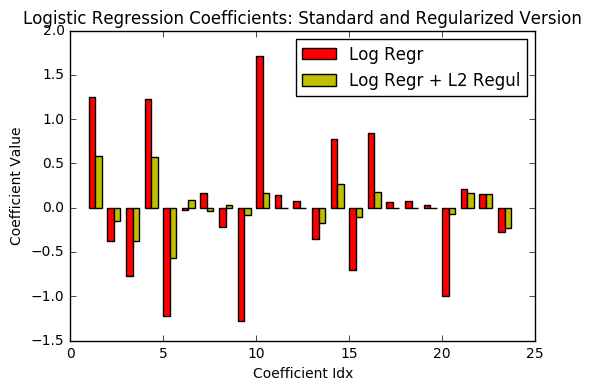

In [214]:
#print the coefficients from logistic regression
print reg.coef_

#print the coefficients from L2 regularized logistic regression
print regL2_final.coef_


# Plot the coefficients
regL2_final_coef = regL2_final.coef_.reshape(regL2_final.coef_.shape[1],)
ind = np.arange(1,len(reg_coef)+1)  # the x locations for the groups
width = 0.35       # the width of the bars
fig, ax = plt.subplots()

rects1 = ax.bar(ind, reg_coef, width, color='r')
rects2 = ax.bar(ind + width, regL2_final_coef, width, color='y')
ax.legend((rects1[0], rects2[0]), ('Log Regr', 'Log Regr + L2 Regul'))
plt.xlabel('Coefficient Idx')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients: Standard and Regularized Version')
plt.show()

### TODO 6: how do the coefficients from L2 regularization compare to the ones from logistic regression? (max 5 lines)
In L2 regularisation the coefficients generally are smaller and seem vaguely proportional to some standard ones (1, 2, 3, 4, 5, 13, 14, 15, 16, 21, 22, 23) but quite differnets for others (9, 10, 20). We can also notice that 5 coefficients are almost zero.

### TODO 7: obtain classification accuracy on training and test data for the L2 regularized model

In [215]:
#now get training and test error and print training and test accuracy

# predictions on training data 
Yhat_tr_LR_L2 = regL2_final.predict(Xtr)

# predictions on test data 
Yhat_test_LR_L2 = regL2_final.predict(Xtest)

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn on training data
print "Training Accuracy:", 100*metrics.accuracy_score(Yhat_tr_LR_L2,Ytr)

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn on test data
print "Test Accuracy:",100*metrics.accuracy_score(Yhat_test_LR_L2,Ytest)

Training Accuracy: 82.0
Test Accuracy: 76.8882175227


### TODO 8: how does accuracy compare to logistic regression? Comment (max 5 lines).
Test Accuracy increases (from 73% to 77%) this can be explained by the same motivations seen in the first part of this notebook (regularization decreases overfitting/variance part of generalisation error). But let me also underline the fact that Cross Validation, that we always use with Regularization, offers an estimate of validation error over wich we optimize C, leading to a better model for unseen inputs. On the other hand Training Accuracy decreases (from 88% to 82%) as expected. 

### TODO 9: Use L1 regularized logistic regression with cross-validation

We perform the L1 regularization for different values of the regularization parameter $C$, and use the Scikit-learn function to perform cross-validation (CV).

In L1 regularized logistic regression, the following L1 regularization term is added to the loss:

$$
    \lambda \sum_{j=1}^p |\beta_j|
$$

where $\lambda >0 $ is the complexity or regularization parameter. Note that the term above is *subtracted* since for logistic regression we want to maximize the log-likelihood.

The parameter $C$ used by Scikit learn corresponds to the inverse of $\lambda$, that is $C = \frac{1}{\lambda}$.

Note: the CV in Scikit-learn is by default a *stratified* CV, that means that data is split into train-validation while maintaining the proportion of different classes in each fold.

In the code below:
- use LogisticRegressionCV() to select the best value of C with a 10-fold CV with L1 penalty;
- use LogisticRegression() to learn the best model for the best C with L1 penalty on the entire training set

Note: not all the solvers in LogisticRegressionCV() and LogisticRegression() can be used for L1 regularization! See the documentation and choose an appropriate solver.

In [216]:
#define the model using LogisticRegressionCV passing an appropriate solver, cv value, and choice of penalty
regL1 = linear_model.LogisticRegressionCV(cv=10, penalty='l1',solver='liblinear')

#fit the model on training data
regL1.fit(Xtr,Ytr)

#print the best C
print regL1.C_


#define the model using the best C and an appropriate solver
regL1_final = linear_model.LogisticRegression(C=regL1.C_[0], penalty='l1',solver='liblinear')


#fit the model using the best C on the entire training set
regL1_final.fit(Xtr,Ytr)

[ 0.35938137]


LogisticRegression(C=0.35938136638046259, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

### TODO 10: plot the coefficients from logistic regression and the regularized version.

[[ 1.25201779 -0.37342915 -0.77588061  1.22533153 -1.22533153 -0.03164777
   0.16921452 -0.21494585 -1.28222577  1.70938264  0.14792172  0.0772415
  -0.34982568  0.77546383 -0.70707244  0.84004774  0.06903809  0.0772415
   0.03444614 -0.9963157   0.21137852  0.15733322 -0.27011602]]
[[  5.83590610e-01  -1.51079781e-01  -3.81367605e-01   5.70316131e-01
   -5.70316131e-01   8.94187493e-02  -3.89289861e-02   2.99025522e-02
   -8.42801879e-02   1.62390906e-01   3.04743555e-07   1.59130456e-07
   -1.78234196e-01   2.64076886e-01  -1.05926105e-01   1.78632255e-01
    1.42230055e-07   1.59130456e-07   7.09648374e-08  -6.89185709e-02
    1.67770344e-01   1.48981673e-01  -2.25666328e-01]]
[[ 0.55034162  0.          0.          0.64567394 -0.48381187  0.          0.
   0.          0.          0.          0.          0.          0.
   0.0092227   0.          0.00655243  0.          0.          0.          0.
   0.          0.         -0.16880602]]


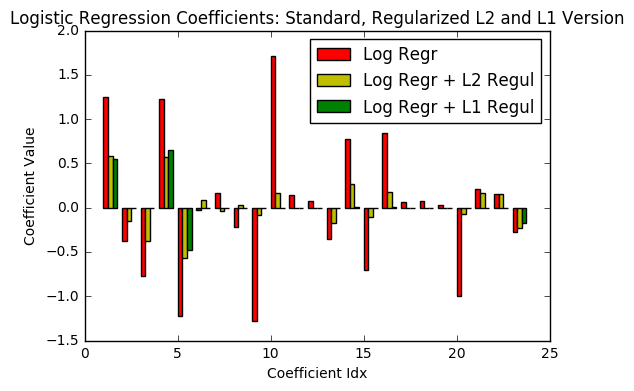

In [217]:
#print the coefficients from logistic regression
print reg.coef_

#print the coefficients from L2 regularized logistic regression
print regL2_final.coef_

#print the coefficients from L1 regularized logistic regression
print regL1_final.coef_

# Plot the coefficients
regL1_final_coef = regL1_final.coef_.reshape(regL1_final.coef_.shape[1],)

ind = np.arange(1,len(reg_coef)+1)  # the x locations for the groups
width = 0.25       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, reg_coef, width, color='r')
rects2 = ax.bar(ind + width, regL2_final_coef, width, color='y')
rects3 = ax.bar(ind + 2*width, regL1_final_coef, width, color='g')
ax.legend((rects1[0], rects2[0], rects3[0]), ('Log Regr', 'Log Regr + L2 Regul', 'Log Regr + L1 Regul'))
plt.xlabel('Coefficient Idx')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients: Standard, Regularized L2 and L1 Version')
plt.show()

### TODO 11: how do the coefficients from L1 regularization compare to the ones from logistic regression and to the ones from L2 regularization? (max 5 lines)
The coefficients from L1 regularization are characterized by the fact that only 6 of them are nonzero while in L2 regularization even if the norms can be really small the coefficients are still all different from zero. This result being common for both linear and logistic regression may let us think that this a general behaviour of L1 and L2 regularizations. Looking more closely to the nonzero coefficients of L1 regularization we see that they keep the sign of no-regularization ones, and that their norms are similar to thoose of L2 regularization.

### TODO 12: obtain classification accuracy on training and test data for the best L1 regularized model

In [225]:
#now get training and test error and print training and test accuracy

# predictions on training data 
Yhat_tr_LR_L1 = regL1_final.predict(Xtr)

# predictions on test data 
Yhat_test_LR_L1 = regL1_final.predict(Xtest)

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn on training data
print "Training Accuracy:", 100* metrics.accuracy_score(Yhat_tr_LR_L1,Ytr)

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn on test data
print "Test Accuracy:",100* metrics.accuracy_score(Yhat_test_LR_L1,Ytest)
print Ytest.sum()/Ytest.shape

Training Accuracy: 81.0
Test Accuracy: 77.4509803922
[ 0.41176471]


### TODO 13: how does accuracy compare to logistic regression and to L2 regularization? (max 5 lines)
Astonishingly we obtain exactly the same results as in L2 regularization even if the coefficients are different. We can suppose that the errors have also been done in the same predictions : even if our linear classification model is very good some outcomes are not predictable with this training data and linear model set (the set of points may not be linearly separable).

### TODO 14: use different data size

Perform the same estimation procedures using different more points on the training data, that is fix Ntr = 100. You can simply copy and paste the code above into the cell below.

C:\Program Files\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Log Regr Test Accuracy: 76.3071895425
Log Regr + L2 Regul Test Accuracy: 79.0849673203
Log Regr + L1 Regul Test Accuracy: 77.4509803922
[[ 0.38888618  0.27885841 -0.57968209  0.96220821 -0.96220821 -0.03848899
   0.45643564  0.14188432 -0.15980169  0.31214787 -1.54400537 -0.56058734
  -0.01826178  0.44301106 -0.56293622  0.84255929  0.05150577 -0.73902976
   0.0256985  -0.0923838   0.19629496  0.05313777 -0.20735408]]
[[  1.66829907e-01   1.05211208e-01  -2.36313458e-01   3.69918376e-01
   -3.69918376e-01  -1.78423498e-02  -2.06209683e-02   7.03475472e-02
    1.04454542e-03   5.84320067e-03  -1.14801893e-01  -4.65500683e-02
   -6.29108272e-02   1.35926818e-01  -8.07157968e-02   8.88613599e-02
   -6.49263392e-08  -5.81932754e-02  -3.23946095e-08   6.43643593e-02
    1.35836755e-01   4.57786101e-02  -1.47702872e-01]]
[[ 0.          0.          0.          0.00262858 -0.29392883  0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.

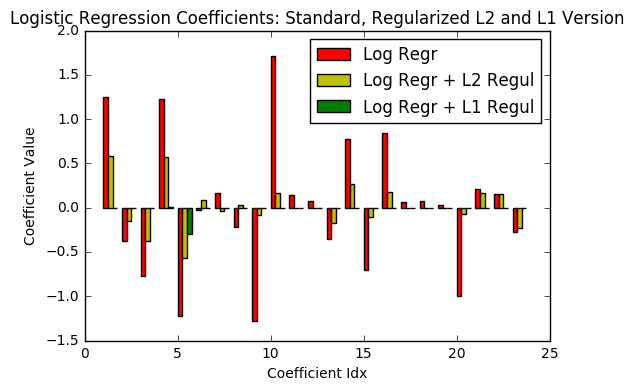

In [219]:
#put in this cell the code to do the same analysis as before but with Ntr=100

# Split data into training and validation data

N = np.shape(X)[0]

#put here your ``numero di matricola''
Numero_di_Matricola = 1067494 

Ntrain = 100  # use 50 samples for training + validation...
Ntest = N-Ntrain # and the rest for testing

Xtr, Xtest, Ytr, Ytest = train_test_split(X, Y, test_size=Ntest/N, random_state = Numero_di_Matricola)

Ntr = Xtr.shape[0]
Ntest = Xtest.shape[0]

# Standardize the Features Matrix

scaler = preprocessing.StandardScaler().fit(X)
Xtr = scaler.transform(Xtr)
Xtest = scaler.transform(Xtest)  # use the same transformation on test data

# define a logistic regression model with very high C parameter -> low impact from regularization
reg = linear_model.LogisticRegression(C=100000000, solver='newton-cg')

#fit the model on training data
reg.fit(Xtr, Ytr)

#prediction on training data
Yhat_tr_LR = reg.predict(Xtr)

#prediction on test data
Yhat_test_LR = reg.predict(Xtest)

#define the model using LogisticRegressionCV passing an appropriate solver, cv value, and choice of penalty
regL2 = linear_model.LogisticRegressionCV(cv=10, penalty='l2',solver='newton-cg') 

#fit the model on training data
regL2.fit(Xtr,Ytr)

#define the model using the best C and an appropriate solver
regL2_final = linear_model.LogisticRegression(C=regL2.C_[0], penalty='l2',solver='newton-cg')

#fit the model using the best C on the entire training set
regL2_final.fit(Xtr,Ytr)

# predictions on training data 
Yhat_tr_LR_L2 = regL2_final.predict(Xtr)

# predictions on test data 
Yhat_test_LR_L2 = regL2_final.predict(Xtest)

#define the model using LogisticRegressionCV passing an appropriate solver, cv value, and choice of penalty
regL1 = linear_model.LogisticRegressionCV(cv=10, penalty='l1',solver='liblinear')

#fit the model on training data
regL1.fit(Xtr,Ytr)

#define the model using the best C and an appropriate solver
regL1_final = linear_model.LogisticRegression(C=regL1.C_[0], penalty='l1',solver='liblinear')


#fit the model using the best C on the entire training set
regL1_final.fit(Xtr,Ytr)

# predictions on training data 
Yhat_tr_LR_L1 = regL1_final.predict(Xtr)

# predictions on test data 
Yhat_test_LR_L1 = regL1_final.predict(Xtest)

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for test dataset
print "Log Regr Test Accuracy:", 100*metrics.accuracy_score(Yhat_test_LR,Ytest)

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn on test data
print "Log Regr + L2 Regul Test Accuracy:",100*metrics.accuracy_score(Yhat_test_LR_L2,Ytest)

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn on test data
print "Log Regr + L1 Regul Test Accuracy:",100* metrics.accuracy_score(Yhat_test_LR_L1,Ytest)

#print the coefficients from logistic regression
print reg.coef_

#print the coefficients from L2 regularized logistic regression
print regL2_final.coef_

#print the coefficients from L1 regularized logistic regression
print regL1_final.coef_

# Plot the coefficients
regL1_final_coef = regL1_final.coef_.reshape(regL1_final.coef_.shape[1],)

ind = np.arange(1,len(reg_coef)+1)  # the x locations for the groups
width = 0.25       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, reg_coef, width, color='r')
rects2 = ax.bar(ind + width, regL2_final_coef, width, color='y')
rects3 = ax.bar(ind + 2*width, regL1_final_coef, width, color='g')
ax.legend((rects1[0], rects2[0], rects3[0]), ('Log Regr', 'Log Regr + L2 Regul', 'Log Regr + L1 Regul'))
plt.xlabel('Coefficient Idx')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients: Standard, Regularized L2 and L1 Version')
plt.show()



### TODO 15: how do the results change with Ntr=100? (max 10 lines)
The first thing we note is that . Looking at the coefficients we see that only one L1 regularized coefficent is different from zero, while for no regularization and L2 regularization there has been only some slight adjustements of the coefficients. With respect to Ntr=50, the accuracy with Ntr=100 have slightly increased for each method of regularization. With no regularization from 73,1 to 76,3 ; with L2 regularization from 76,9 to 79,1 and with L1 regularization from 76,9 to 77,5. So L2 regularization scores better than L1 regularization now, but it is interesting that L2 regularization enable us to done really good predictions on survival with only 1 coefficient, wich is related to being a female.